<a href="https://colab.research.google.com/github/jtracos/Helper/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2>Modelo de regresión lineal</h2>

In [3]:
#librerias necesarias para este caso
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model, preprocessing, pipeline

<p>
  <span>Se puede implementar usando <b>scikit-learn</b> que, a pesar de su complejidad, es muy flexible y puede resultar útil al  desarrollar modelos estadísticos más complejos.</span>
</p>
<p>La documentación de este módulo está muy bien organizada y se encuentra <a href="https://scikit-learn.org/stable/index.html"> aquí</a></p>
<p>A continuación se muestra un ejemplo simple para un modelo de regresión polinomial</p>

<p>Generamos los datos para realizar las estimaciones del modelo.</p>
<p>Usaremos un modelo polinomial de segundo orden</p>

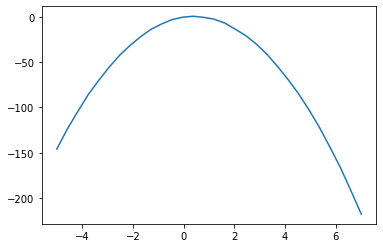

In [4]:
x = np.linspace(-5,7, 30)# shape(30,)=>shape(30,1)
x= x.reshape(x.shape[0],1) #el método reshape permite alterar las dimensiones de cualquier arreglo de numpy, si es posible hacerlo

#el metodo squeeze regresa a una dimension cualquier matriz
y = -1 + 4*x.squeeze() - 5*x.squeeze()**2 + np.random.random(x.shape[0])
_ = plt.plot(x,y)

<p><i>sklearn</i> divide sus métodos en dos partes 
<ul>
<li>transformers</li>
y
<li>estimadores</li>
</ul>
</p>
<p>Los <b>transformadores</b> son métodos que permiten <i>transformar</i> los datos de una manera util. Estos tienen dos métodos esenciales
<ul>
<li>fit</li>
Este método permite realizar la estimacion de los párametros necesarios para las transformación de las entradas
<li>transform</li>
Este métodos realiza como tal las transformaciones necesarias a las entradas, normalmente se usa después del método anterior
</ul>
</p>

<p>
Los <b>estimadores</b> incluyen dos metodos esenciales
<ul>
<li>fit</li>
Este método realiza las estimaciones requeridas de los parámetros del modelo.
<li>predict</li>
Sirve para realizar predicciones con el modelo final, 
</ul>
</p>

In [5]:
#transformacion de los datos para un polinomio de 3 grado
ft_trans = preprocessing.PolynomialFeatures(degree=2)
#modelo de regresion lineal
modelo = linear_model.LinearRegression(fit_intercept=False)

In [ ]:
ft_trans.fit(x)

PolynomialFeatures()

In [ ]:
x_trans = ft_trans.transform(x)

In [ ]:
modelo = modelo.fit(x_trans,y)

In [ ]:
y_pred = modelo.predict( x_trans)

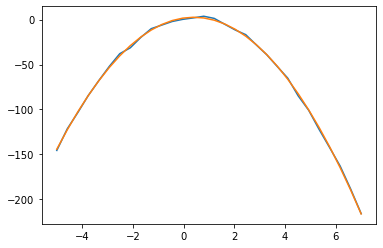

In [ ]:
plt.plot(x,y, x, y_pred)

<h3>Pipelines</h3>
<p>Útiles cuando se requieren aplicar multiples transformaciones y estimaciones a un modelos. Al usar pipelines se usan los métodos similares a aquellos de los estimadores </p>

In [6]:
pipe = pipeline.Pipeline([("Transformer",ft_trans), 
                          ("modelo", modelo)])

In [10]:
#el método named_steps contiene en un diccionario con los transformers y estimators en el pipeline
#estos se pueden extraer con el nombre que le dimos
pipe.named_steps["Transformer"]

PolynomialFeatures()

In [ ]:
pipe = pipe.fit(x,y)

In [ ]:
y_pred = pipe.predict(x)

In [ ]:
modelo.coef_

array([-1.,  4., -5.])